Univariate Groundwater Time Series Analysis and Forecasting with Python

 About Time Series analysis
* Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.
* Time series forecasting is the use of a model to predict future values based on previously observed values.

In [1]:
# importing libreries and changing their name

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## The Data

<p>We are using Ground Water Data.</p>

In [2]:
# read the excel file
furniture = pd.read_excel("Budi_data3_sumur_3.xls")
furniture.head()

,Row ID,Order ID,Measurement Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,GWE,Quantity,Discount,Profit
0,1,0,2005-01-01,2005-01-01,Standard Class,0,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,2736.4316,1.0,1.0,1.0
1,2,0,2005-02-01,2005-02-01,Standard Class,1,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,2736.4872,1.0,1.0,1.0
2,3,0,2005-03-01,2005-03-01,Standard Class,2,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,2736.5428,1.0,1.0,1.0
3,4,0,2005-04-01,2005-04-01,Standard Class,3,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,2736.5984,1.0,1.0,1.0
4,5,0,2005-05-01,2005-05-01,Standard Class,4,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,2736.6540,1.0,1.0,1.0


In [3]:
furniture.describe()

,Row ID,Order ID,Customer ID,Postal Code,GWE,Quantity,Discount,Profit
count,144.000000,144.0,144.000000,144.000000,144.000000,120.0,120.0,120.0
mean,72.500000,0.0,71.500000,92309.083333,2740.768390,1.0,1.0,1.0
std,41.713307,0.0,41.713307,5.467642,5.453873,0.0,0.0,0.0
min,1.000000,0.0,0.000000,92307.000000,2733.770000,1.0,1.0,1.0
25%,36.750000,0.0,35.750000,92307.000000,2735.583478,1.0,1.0,1.0
50%,72.500000,0.0,71.500000,92307.000000,2739.611957,1.0,1.0,1.0
75%,108.250000,0.0,107.250000,92307.000000,2745.923958,1.0,1.0,1.0
max,144.000000,0.0,143.000000,92331.000000,2750.487931,1.0,1.0,1.0


## Data Preprocessing

In [4]:
# Remove columns which are not required in predictions

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis = 1, inplace = True)
furniture.head()

,Measurement Date,GWE
0,2005-01-01,2736.4316
1,2005-02-01,2736.4872
2,2005-03-01,2736.5428
3,2005-04-01,2736.5984
4,2005-05-01,2736.6540


In [5]:
# Sort the Order Date 
furniture = furniture.sort_values('Measurement Date')

#print the sorted values
print(furniture.head(1))

#check any missing values
furniture.isnull().sum()

  Measurement Date        GWE
0       2005-01-01  2736.4316


Measurement Date    0
GWE                 0
dtype: int64

In [6]:
# grouping sales according to Order Date
furniture.groupby('Measurement Date')['GWE'].sum().reset_index()

# min and max values of Order Date
print(furniture['Measurement Date'].min())
print(furniture['Measurement Date'].max())

2005-01-01 00:00:00
2016-12-01 00:00:00


In [7]:
#set 'Order Date' as index
furniture = furniture.set_index('Measurement Date')
furniture.index

DatetimeIndex(['2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
               '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01',
               '2005-09-01', '2005-10-01',
               ...
               '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
               '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
               '2016-11-01', '2016-12-01'],
              dtype='datetime64[ns]', name='Measurement Date', length=144, freq=None)

In [8]:
# average the daily sales value for each month 
# use start of each month as the timestamp
y = furniture['GWE'].resample('MS').mean()
y['2017':]

Series([], Freq: MS, Name: GWE, dtype: float64)

## Data Visualization

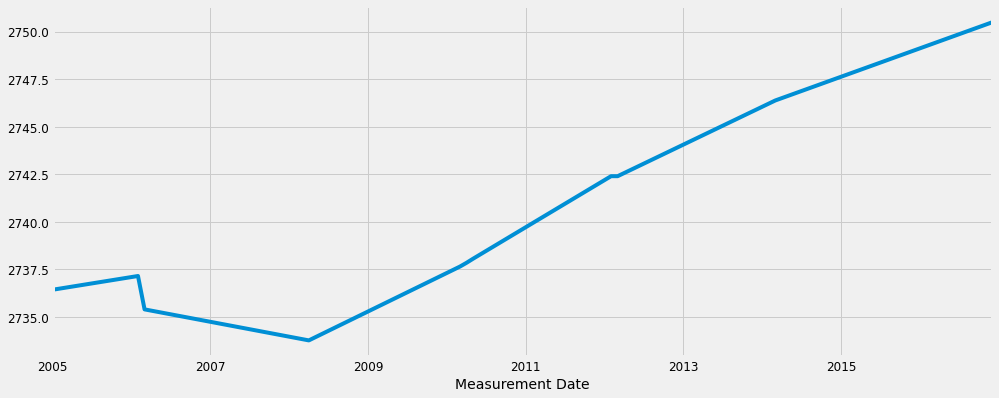

In [9]:
y.plot(figsize = (15, 6))
plt.show()

# Time-series decompositon 
* It allows us to decompose our time series into three distinct components
<ul>
<li>Trend</li>
<li>Seasonality</li>
<li>Noise</li>
</ul>


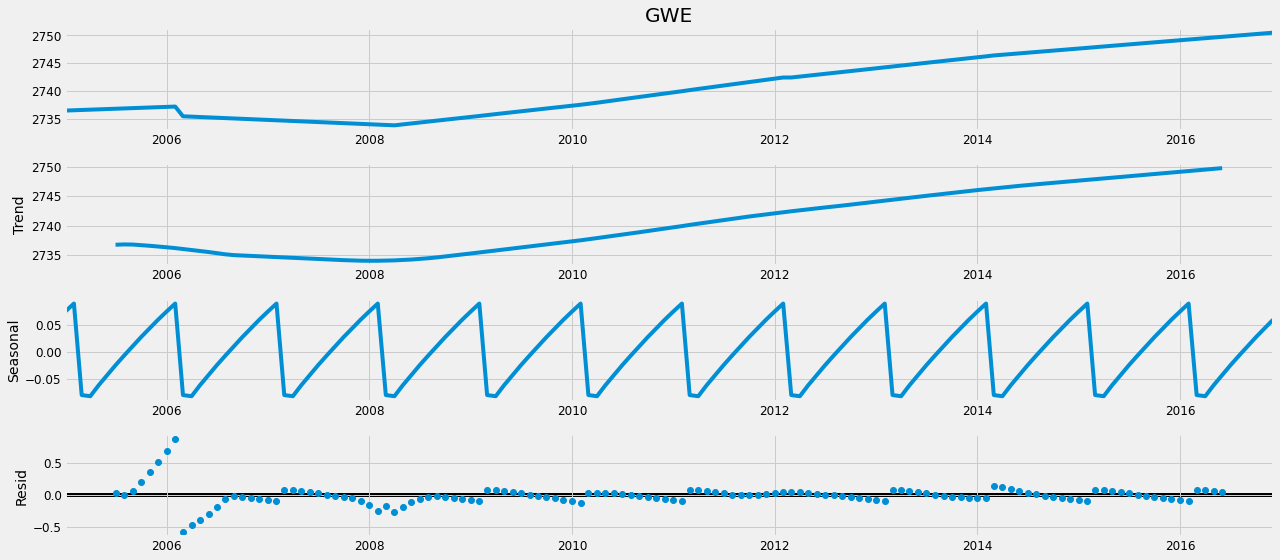

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

## Time series forecasting with ARIMA model

<p>
    <b><i>About ARIMA model</i></b>
<ul>
    <li>ARIMA stands for <i>Autoregressive Integreted Moving Average</i></li>
    <li>ARIMA models are denoted with the notation <i>ARIMA(p, d, q)</i></li>
    <li>These three parameters account for <i>seasonality, trend, and noise</i> in data</li>
</ul>
</p>

In [11]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [12]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2690.4610190282892
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2534.3102351759344
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:530.78878337231
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:433.0616521335438


D:\ProgramData\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1193.801862237042


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1101.591024416058
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:363.37954342604326
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:355.98735755017174
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2498.8025396085795


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2550.8064310977466
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:365.0552650523384
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:280.8648542666753
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2646.274600428408


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1050.2028789089309
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:224.9499299283102
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:222.60918655569884
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-44.90158880156911
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-59.1860189415235
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-8.618450213156727
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-53.474266307530534
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-66.18061454532045
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-72.79410673018714
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-56.85705476347247
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-55.309557903584505
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-65.40845429338191
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-71.62106658303745
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-8.097211418976286
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-58.183070103976846
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-74.55924862725774
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-79.72864483259924
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-60.213978

D:\ProgramData\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:-17.64392041225867
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-3.869606312028239
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:-0.47348572883888096


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:53.69797099838476


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:10.770545365131795
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-19.45921603009191


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:-48.959531844544706
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-14.443908657481956
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:-39.37293782472376
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-3.4497605838718357


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:0.38226146411027173


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:67.99848592423018
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-5.234072486027841


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-55.134977958827456
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:-50.006856315240576
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-80.17497535957064
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:-80.8922362341464
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-8.35863154192603
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-61.40611482744626
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-81.68195211383114
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-84.84502166778047
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-62.80076326767448
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-62.85543981696868
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-113.87111492709744
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-111.87309386604707
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-9.967794083220454
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-78.61277678725781
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-111.87327517985794
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-110.2804660505817
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-78.63749185827673
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-82.1710

###### Fitting the ARIMA model

In [13]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9416      0.082     11.503      0.000       0.781       1.102
ma.L1         -0.7721      0.143     -5.409      0.000      -1.052      -0.492
ar.S.L12      -0.7917      0.009    -88.011      0.000      -0.809      -0.774
sigma2         0.0276      0.001     26.861      0.000       0.026       0.030


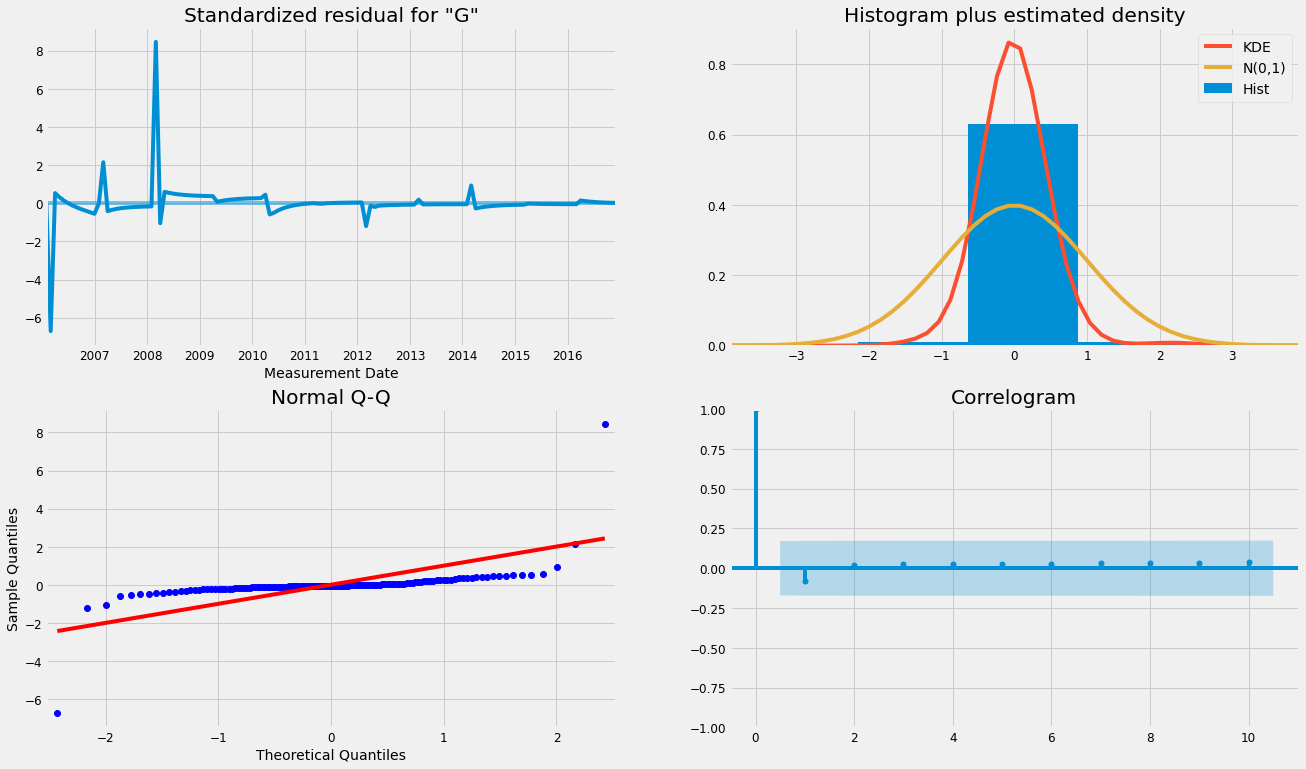

In [14]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (20, 12))
plt.show()

<p>It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.</p>

###### Validating Forecasts

<p>
To help us understand the accuracy of our forecasts, we compare predicted GWE to real GWE of the time series, and we set forecasts to start at <i>2017–01–01</i> to <i>the end of the data.</i>
</p>

In [15]:
prediction = result.get_prediction(start = pd.to_datetime('2013-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower GWE,upper GWE
Measurement Date,,
2013-01-01,2743.744684,2744.396262
2013-02-01,2743.910125,2744.561703
2013-03-01,2744.032629,2744.684207
2013-04-01,2744.240073,2744.891652
2013-05-01,2744.405501,2745.057079
2013-06-01,2744.571021,2745.222599
2013-07-01,2744.736612,2745.388190
2013-08-01,2744.902258,2745.553837
2013-09-01,2745.067947,2745.719526


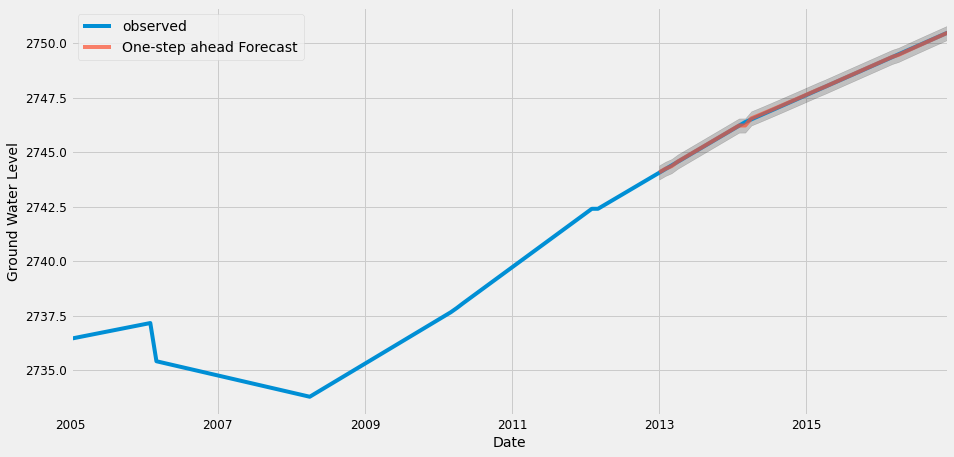

In [16]:
#Visualize the forecasting
ax = y['2005':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Ground Water Level')
plt.legend()
plt.show()

<p>The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.
</p>

###### Error Analysis

In [17]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
y_hat = prediction.predicted_mean
y_truth = y['2013-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 4)))


The Mean Squared Error of our forecasts is 0.0007
The Root Mean Squared Error of our forecasts is 0.0273


##### Producing and visualizing forecasts

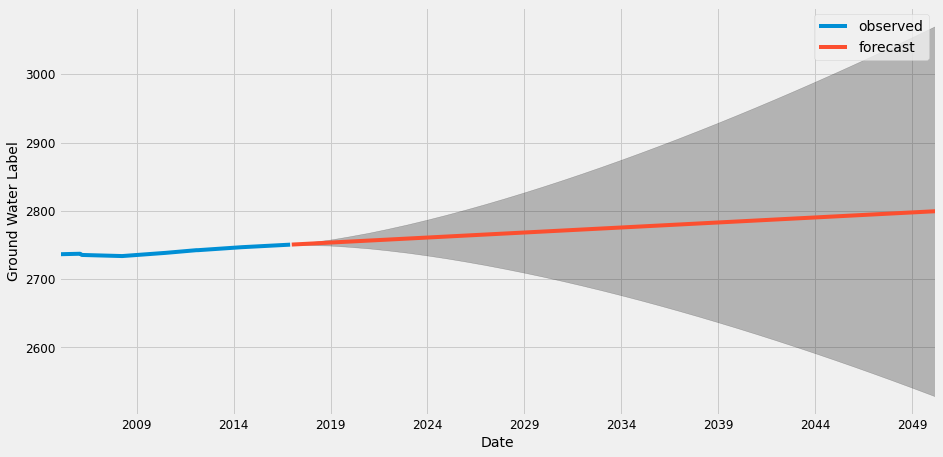

In [18]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 400)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Ground Water Label')

plt.legend()
plt.show()


## Summary

<ul>
<li>Our model clearly captured Ground Water seasonality.</li>
<li>As we forecast further out into the future, it is natural for us to become less confident in our values.</li>
<li>This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.</li>

</ul>

In [19]:
pred_uc.predicted_mean['2040'].describe()

count      12.000000
mean     2785.125122
std         0.442216
min      2784.451619
25%      2784.787569
50%      2785.124483
75%      2785.462215
max      2785.800643
Name: predicted_mean, dtype: float64

In [20]:
df = pd.DataFrame(pred_uc.predicted_mean['2040'])
display(df)

,predicted_mean
2040-01-01,2784.451619
2040-02-01,2784.573655
2040-03-01,2784.695834
2040-04-01,2784.818148
2040-05-01,2784.940588
2040-06-01,2785.063147
2040-07-01,2785.185818
2040-08-01,2785.308595
2040-09-01,2785.431472
2040-10-01,2785.554443
